## Survey about  attitudes towards mental health
### By : Emad Ali Emad

Dataset Information
This dataset is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace.

Some questions worth exploring:

-How does the frequency of mental health illness and attitudes towards mental health vary by geographic location?
-What are the strongest predictors of mental health illness or certain attitudes towards mental health in the workplace?


## Import libraries 

In [50]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler #to scale numerical input features to a specified range

from sklearn.model_selection import train_test_split # for splitting a dataset into training and testing sets

from sklearn.preprocessing import OneHotEncoder #encoding categorical variables into numerical variables 


from sklearn.neighbors import KNeighborsClassifier #for building a k-nearest neighbors (KNN) classification model

from sklearn.metrics import accuracy_score  # used to evaluate the accuracy of a classification model


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# to handle warnings that may occur during the execution of a program

## Importing Data

In [51]:
df = pd.read_csv('survey.csv')
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [52]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [53]:
df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


## -Data cleaning


In [54]:
# drop any rows where the 'comments' column is not relevant
df = df.drop(['comments'], axis=1)

# drop any rows where the 'Timestamp' column is not a valid date
df = df[pd.to_datetime(df['Timestamp'], errors='coerce').notnull()]

# drop any rows where the 'Age' column is not between 18 and 100
df = df[(df['Age'] >= 18) & (df['Age'] <= 100)]

# replace any missing values in the 'state' column with 'Unknown'
df['state'] = df['state'].fillna('Unknown')

# replace any missing values in the 'self_employed' column with 'Unknown'
df['self_employed'] = df['self_employed'].fillna('Unknown')

# replace any missing values in the 'work_interfere' column with 'Unknown'
df['work_interfere'] = df['work_interfere'].fillna('Unknown')

# convert the 'Gender' column to lowercase and replace any non-binary values with 'Other'
df['Gender'] = df['Gender'].str.lower()
df['Gender'] = df['Gender'].apply(lambda x: 'Other' if x not in ['male', 'female', 'other'] else x)

# convert the 'treatment' column to a boolean value
df['treatment'] = df['treatment'].apply(lambda x: True if x == 'Yes' else False)

# convert the 'no_employees' column to ordered categories
df['no_employees'] = pd.Categorical(df['no_employees'], categories=['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000'], ordered=True)

# convert the 'leave' column to ordered categories
df['leave'] = pd.Categorical(df['leave'], categories=['Very difficult', 'Somewhat difficult', 'Neither easy nor difficult', 'Somewhat easy', 'Very easy'], ordered=True)

## -Encoding data


In [55]:
# Create a list of categorical columns to encode
cat_cols = ['Gender', 'Country', 'state']

# Encode the categorical columns
df_encoded = pd.get_dummies(df, columns=cat_cols)

# View the encoded DataFrame
df_encoded.head()

,Timestamp,Age,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,state_TN,state_TX,state_UT,state_Unknown,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,2014-08-27 11:29:31,37,Unknown,No,True,Often,6-25,No,Yes,Yes,...,0,0,0,0,0,0,0,0,0,0
1,2014-08-27 11:29:37,44,Unknown,No,False,Rarely,More than 1000,No,No,Don't know,...,0,0,0,0,0,0,0,0,0,0
2,2014-08-27 11:29:44,32,Unknown,No,False,Rarely,6-25,No,Yes,No,...,0,0,0,1,0,0,0,0,0,0
3,2014-08-27 11:29:46,31,Unknown,Yes,True,Often,26-100,No,Yes,No,...,0,0,0,1,0,0,0,0,0,0
4,2014-08-27 11:30:22,31,Unknown,No,False,Never,100-500,Yes,Yes,Yes,...,0,1,0,0,0,0,0,0,0,0


## Some Visualization in Data

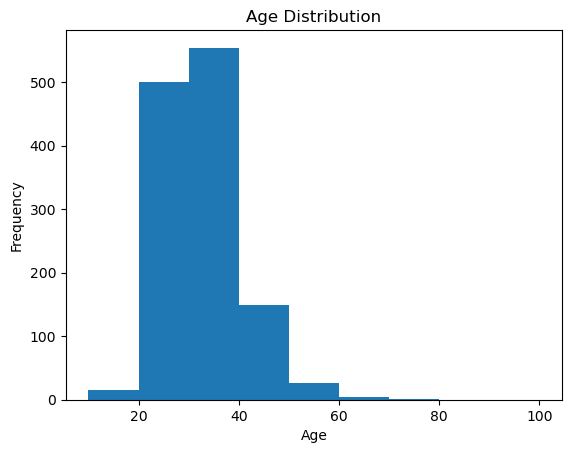

In [58]:
# Create histogram chart
plt.hist(df['Age'], bins=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

# Set chart title and axis labels
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")

# Show chart
plt.show()

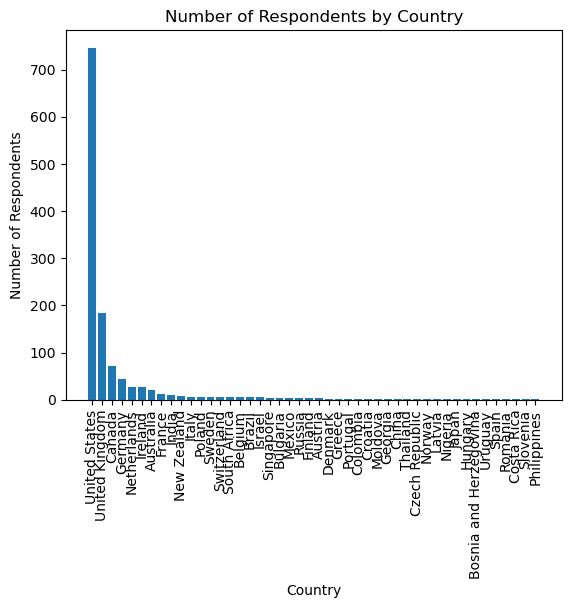

In [59]:
country_counts = df['Country'].value_counts()
plt.bar(country_counts.index, country_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.title('Number of Respondents by Country')
plt.show()

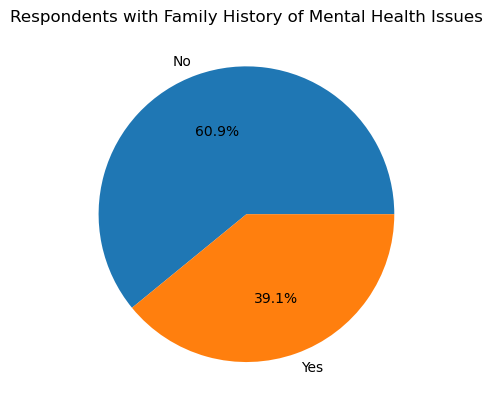

In [60]:
family_history_counts = df['family_history'].value_counts()
plt.pie(family_history_counts.values, labels=family_history_counts.index, autopct='%1.1f%%')
plt.title('Respondents with Family History of Mental Health Issues')
plt.show()

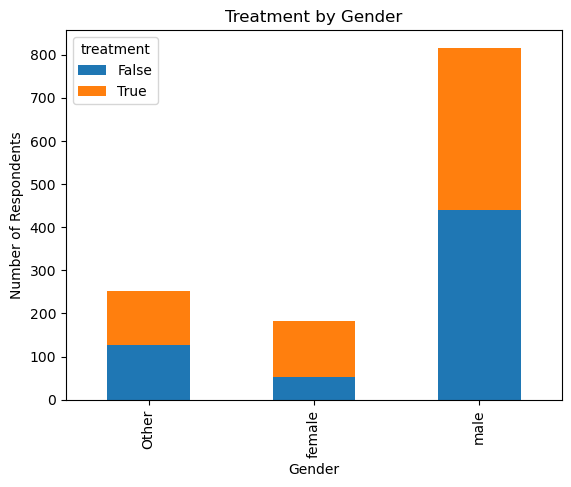

In [61]:
treatment_counts = df.groupby(['Gender', 'treatment'])['Timestamp'].count().unstack()
treatment_counts.plot(kind='bar', stacked=True)
plt.xlabel('Gender')
plt.ylabel('Number of Respondents')
plt.title('Treatment by Gender')
plt.show()

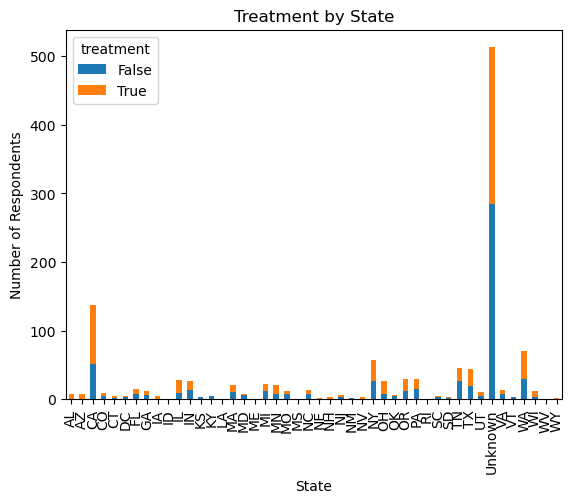

In [62]:
state_treatment_counts = df.groupby(['state', 'treatment'])['Timestamp'].count().unstack()
state_treatment_counts.plot(kind='bar', stacked=True)
plt.xlabel('State')
plt.ylabel('Number of Respondents')
plt.title('Treatment by State')
plt.show()

## -Scaling

In [63]:
# To get numerical columns in our  DataFrame 'df' 
numerical_cols = df.select_dtypes(include='number').columns.tolist()
numerical_cols

['Age']

In [64]:

# Assume the DataFrame 'df' contains the data you want to scale
numerical_cols = ['Age']

# Convert any string columns to numeric type
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce')

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the numerical columns

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [65]:
df[numerical_cols]


,Age
0,0.351852
1,0.481481
2,0.259259
3,0.240741
4,0.240741
...,...
1254,0.148148
1255,0.259259
1256,0.296296
1257,0.518519


## -Split your data into training and testing

In [66]:
'''
Split the data into training and testing sets using train_test_split() 
function from the sklearn.model_selection module
'''
from sklearn.model_selection import train_test_split

X = df[['Age', 'Gender', 'Country', 'state', 'self_employed', 'family_history', 'work_interfere', 'no_employees', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence']]
y = df['treatment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

This will split the data into training and testing sets, with 80% of the data used for training and 20% for testing. The random_state parameter sets the seed for the random number generator, so that the same split can be reproduced if necessary.

X_train and y_train represent the training data, while X_test and y_test represent the testing data. We can then use these variables to train and evaluate your machine learning model

In [67]:
'''
performs one-hot encoding on the categorical columns of a dataset 
and concatenates the encoded categorical columns with the numerical columns. 
and then calculates the training and testing errors of a machine learning model
'''

# Select the categorical columns for encoding
cat_cols = ['Gender', 'Country', 'state', 'self_employed', 'family_history', 'work_interfere', 'no_employees', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence']

# Perform one-hot encoding on the categorical columns in the training data
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[cat_cols])

# Concatenate the encoded categorical columns with the numerical columns in the training data
X_train_processed = np.concatenate((X_train_encoded.toarray(), X_train.drop(cat_cols, axis=1).values), axis=1)

# Perform one-hot encoding on the categorical columns in the testing data
X_test_encoded = encoder.transform(X_test[cat_cols])

# Concatenate the encoded categorical columns with the numerical columns in the testing data
X_test_processed = np.concatenate((X_test_encoded.toarray(), X_test.drop(cat_cols, axis=1).values), axis=1)


train_errors = []
test_errors = []

## -Train the KNN model with several numbers of neighbors[1, 10] then calculate the training and testing error for each k

In [68]:
# Train the KNN model with the processed training data

# Define the range of values of k to try
k_values = list(range(1, 11))

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_processed, y_train)
    
    # Predict the classes of the training and testing data
    y_train_pred = knn.predict(X_train_processed)
    y_test_pred = knn.predict(X_test_processed)
    
    # Calculate the accuracy of the predictions and append to the error lists
    train_errors.append(accuracy_score(y_train, y_train_pred))
    test_errors.append(accuracy_score(y_test, y_test_pred))
    
    
# Print the training and testing errors for each value of k
for k, train_err, test_err in zip(k_values, train_errors, test_errors):
    print(f"k = {k}: training error = {train_err:.3f}, testing error = {test_err:.3f}")

k = 1: training error = 1.000, testing error = 0.653
k = 2: training error = 0.824, testing error = 0.622
k = 3: training error = 0.857, testing error = 0.697
k = 4: training error = 0.789, testing error = 0.709
k = 5: training error = 0.827, testing error = 0.721
k = 6: training error = 0.783, testing error = 0.685
k = 7: training error = 0.812, testing error = 0.721
k = 8: training error = 0.799, testing error = 0.697
k = 9: training error = 0.816, testing error = 0.737
k = 10: training error = 0.800, testing error = 0.709


## Generates a plot of the performance of the K-Nearest Neighbors (KNN) algorithm for a range(1, 11) of values of k.


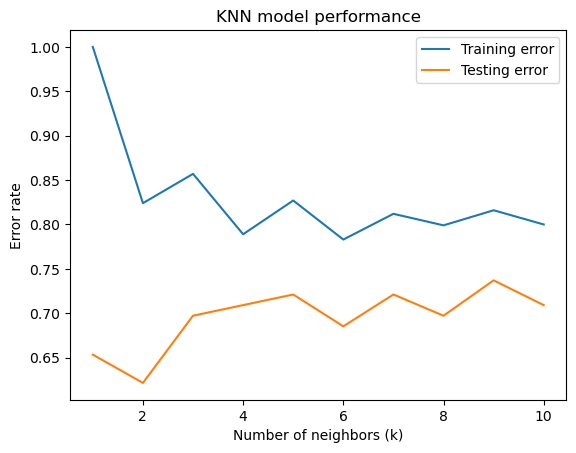

In [69]:
k_values = range(1, len(train_errors) + 1)

plt.plot(k_values, train_errors, label='Training error')
plt.plot(k_values, test_errors, label='Testing error')
plt.xlabel('Number of neighbors (k)')
plt.ylabel('Error rate')
plt.title('KNN model performance')
plt.legend()
plt.show()